# Loan Application Approval Prediction - Analysis Report

This notebook contains a detailed analysis of the loan application dataset, including EDA and visualization.

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Set style for better visualization
sns.set_theme()  # Use seaborn's default theme
sns.set_palette('husl')

# Display all columns
pd.set_option('display.max_columns', None)

## 1. Data Loading and Initial Exploration

In [22]:
# Read the dataset
df = pd.read_csv('Loan Application Accept or Reject.csv')

# Display top 5 rows
print("Top 5 rows:")
display(df.head())

print("\nBottom 5 rows:")
display(df.tail())

Top 5 rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000.0,29900000.0,12,778,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0,Not Graduate,Yes,4100000.0,12200000.0,8,417,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,No,9100000.0,29700000.0,20,506,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3,Graduate,No,8200000.0,30700000.0,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,Yes,9800000.0,24200000.0,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected



Bottom 5 rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000.0,2300000.0,12,317,2800000.0,500000.0,3300000.0,800000.0,Rejected
4265,4266,0,Not Graduate,Yes,3300000.0,11300000.0,20,559,4200000.0,2900000.0,11000000.0,1900000.0,Approved
4266,4267,2,Not Graduate,No,6500000.0,23900000.0,18,457,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268,1,Not Graduate,No,4100000.0,12800000.0,8,780,8200000.0,700000.0,14100000.0,5800000.0,Approved
4268,4269,1,Graduate,No,9200000.0,29700000.0,10,607,17800000.0,11800000.0,35700000.0,12000000.0,Approved


## 2. Rename Columns

In [23]:
# Rename columns to more meaningful names
df.columns = ['loan_id', 'dependents', 'education', 'self_employed', 'annual_income', 
              'loan_amount', 'loan_term', 'cibil_score', 'residential_assets', 
              'commercial_assets', 'luxury_assets', 'bank_assets', 'loan_status']

print("Updated column names:")
print(df.columns.tolist())

Updated column names:
['loan_id', 'dependents', 'education', 'self_employed', 'annual_income', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets', 'commercial_assets', 'luxury_assets', 'bank_assets', 'loan_status']


## 3. Dataset Information

In [24]:
# Display dataset shape
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}\n")

# Display column information
print("Column Information:")
display(df.info())

Total number of rows: 4269
Total number of columns: 13

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             4269 non-null   int64  
 1   dependents          4269 non-null   int64  
 2   education           4267 non-null   object 
 3   self_employed       4269 non-null   object 
 4   annual_income       4267 non-null   float64
 5   loan_amount         4268 non-null   float64
 6   loan_term           4269 non-null   int64  
 7   cibil_score         4269 non-null   int64  
 8   residential_assets  4267 non-null   float64
 9   commercial_assets   4267 non-null   float64
 10  luxury_assets       4268 non-null   float64
 11  bank_assets         4268 non-null   float64
 12  loan_status         4269 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 433.7+ KB


None

## 4. Check for Null Values

Null values in each column:


loan_id               0
dependents            0
education             2
self_employed         0
annual_income         2
loan_amount           1
loan_term             0
cibil_score           0
residential_assets    2
commercial_assets     2
luxury_assets         1
bank_assets           1
loan_status           0
dtype: int64

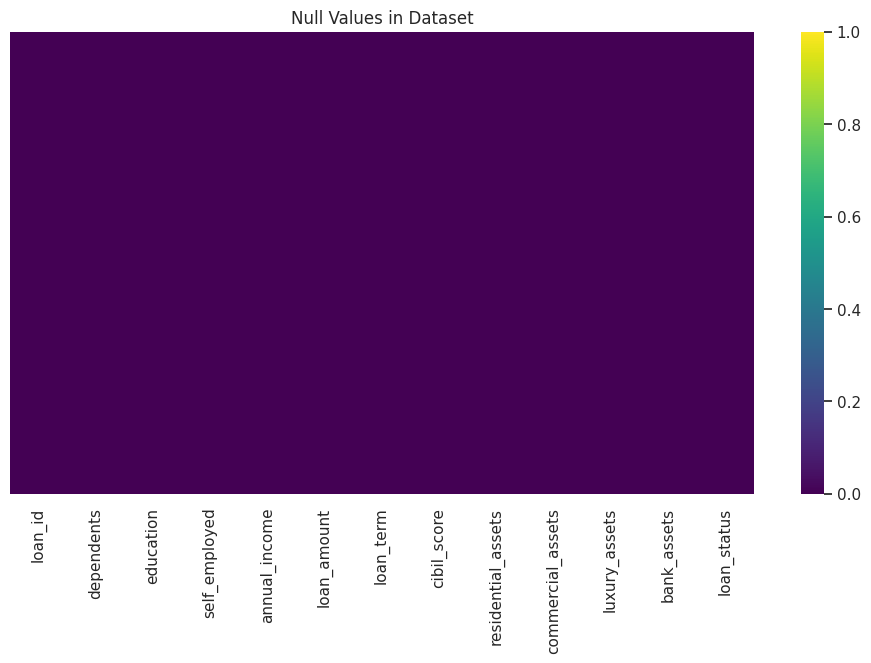

In [25]:
# Display null values count
print("Null values in each column:")
display(df.isnull().sum())

# Visualize null values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Null Values in Dataset')
plt.show()

## 5. Handle Missing Values

In [26]:
# Handle missing values
# Numerical columns - fill with median
numerical_cols = ['annual_income', 'residential_assets', 'commercial_assets', 'luxury_assets', 'bank_assets']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns - fill with mode
categorical_cols = ['education', 'self_employed']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Null values after handling:")
display(df.isnull().sum())

Null values after handling:


loan_id               0
dependents            0
education             0
self_employed         0
annual_income         0
loan_amount           1
loan_term             0
cibil_score           0
residential_assets    0
commercial_assets     0
luxury_assets         0
bank_assets           0
loan_status           0
dtype: int64

## 6. Check and Remove Duplicates

In [27]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Dataset shape after removing duplicates: (4269, 13)


## 7. Encode Categorical Data

In [28]:
# Encode categorical variables
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

print("Dataset after encoding:")
display(df.head())

Dataset after encoding:


,loan_id,dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets,commercial_assets,luxury_assets,bank_assets,loan_status
0,1,2,0,0,9600000.0,29900000.0,12,778,2400000.0,17600000.0,22700000.0,8000000.0,0
1,2,0,1,1,4100000.0,12200000.0,8,417,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3,3,0,0,9100000.0,29700000.0,20,506,7100000.0,4500000.0,33300000.0,12800000.0,1
3,4,3,0,0,8200000.0,30700000.0,8,467,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5,5,1,1,9800000.0,24200000.0,20,382,12400000.0,8200000.0,29400000.0,5000000.0,1


## 8. Handle Outliers

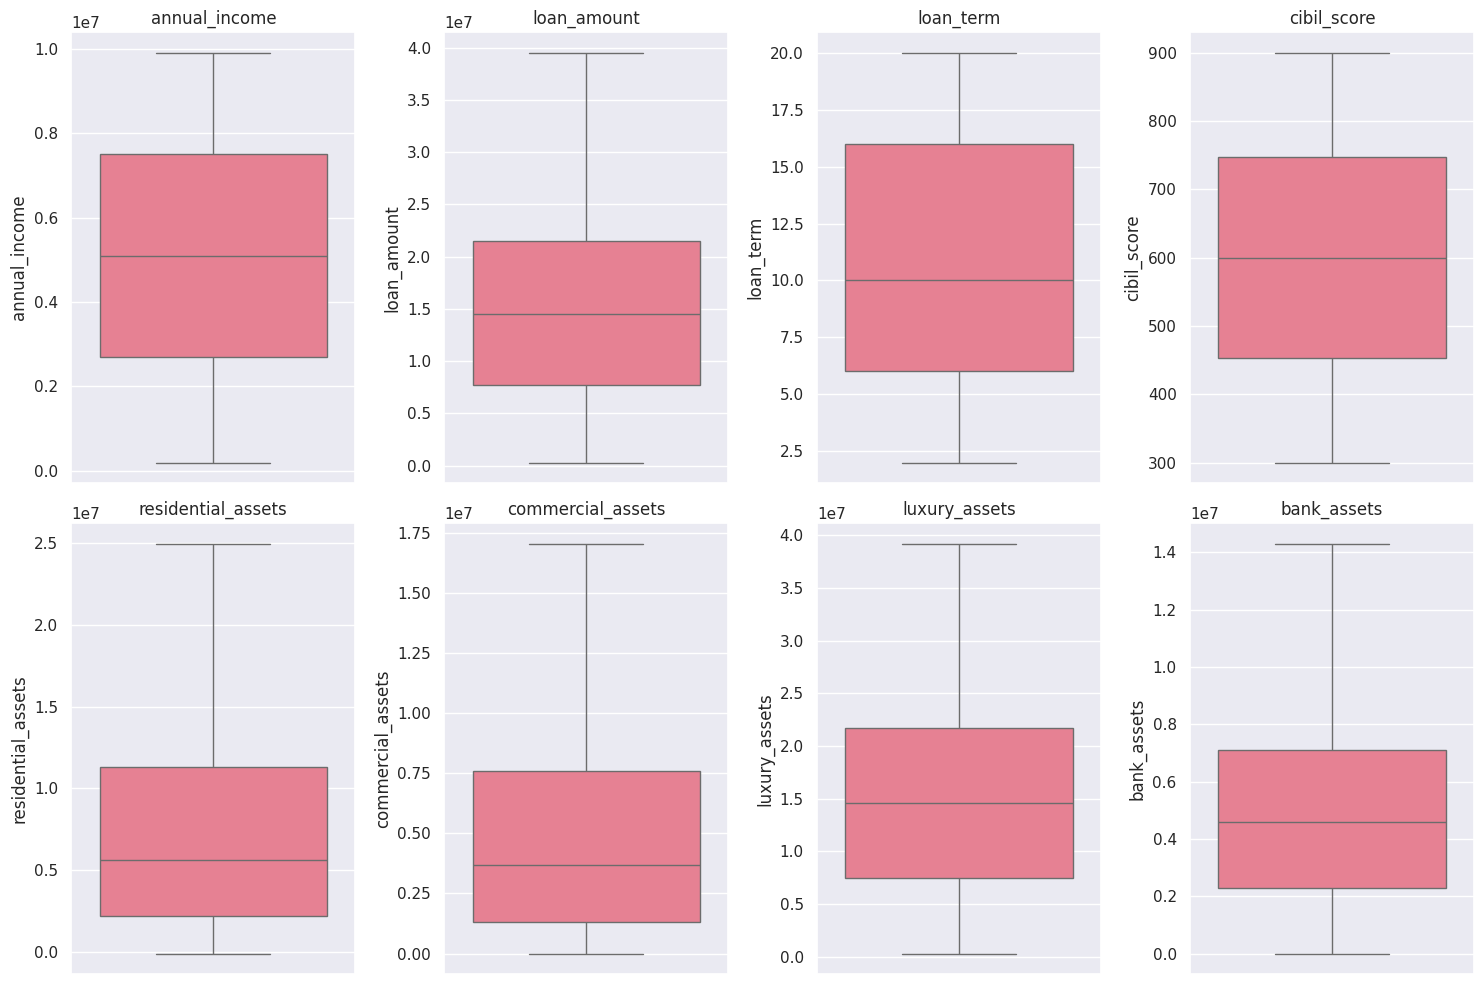

In [29]:
# Function to detect and handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Handle outliers for numerical columns
numerical_cols = ['annual_income', 'loan_amount', 'loan_term', 'cibil_score',
                 'residential_assets', 'commercial_assets', 'luxury_assets', 'bank_assets']

for col in numerical_cols:
    df = handle_outliers(df, col)

# Visualize distributions after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 9. Data Normalization

In [30]:
# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataset after normalization:")
display(df.head())

Dataset after normalization:


,loan_id,dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets,commercial_assets,luxury_assets,bank_assets,loan_status
0,1,2,0,0,0.969072,0.755102,0.555556,0.796667,0.099800,1.000000,0.575835,0.559441,0
1,2,0,1,1,0.402062,0.303571,0.333333,0.195000,0.111776,0.129032,0.218509,0.230769,1
2,3,3,0,0,0.917526,0.750000,1.000000,0.343333,0.287425,0.263930,0.848329,0.895105,1
3,4,3,0,0,0.824742,0.775510,0.333333,0.278333,0.730539,0.193548,0.591260,0.552448,1
4,5,5,1,1,0.989691,0.609694,1.000000,0.136667,0.499002,0.480938,0.748072,0.349650,1


## 10. Visualization Analysis

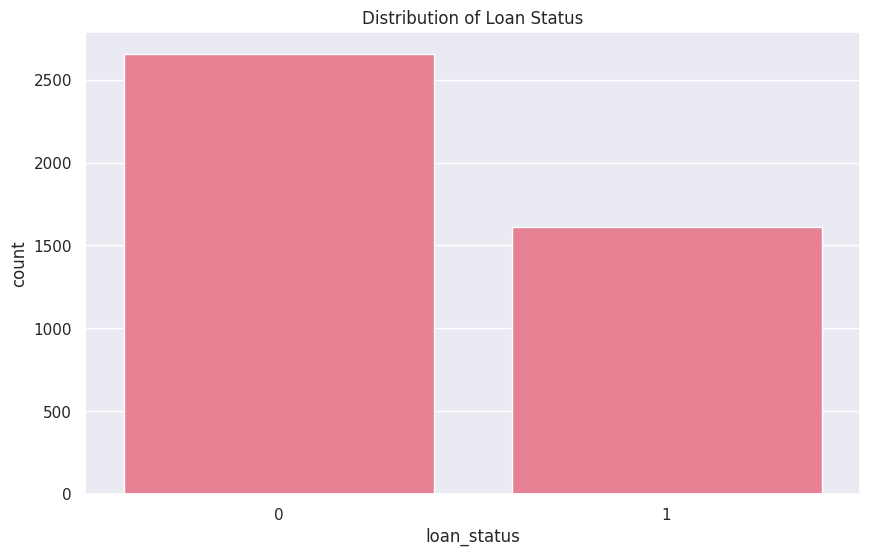

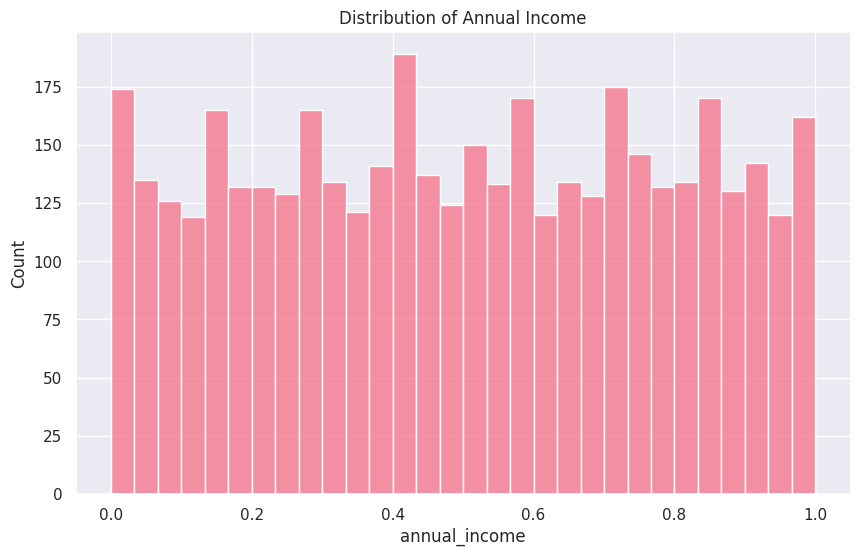

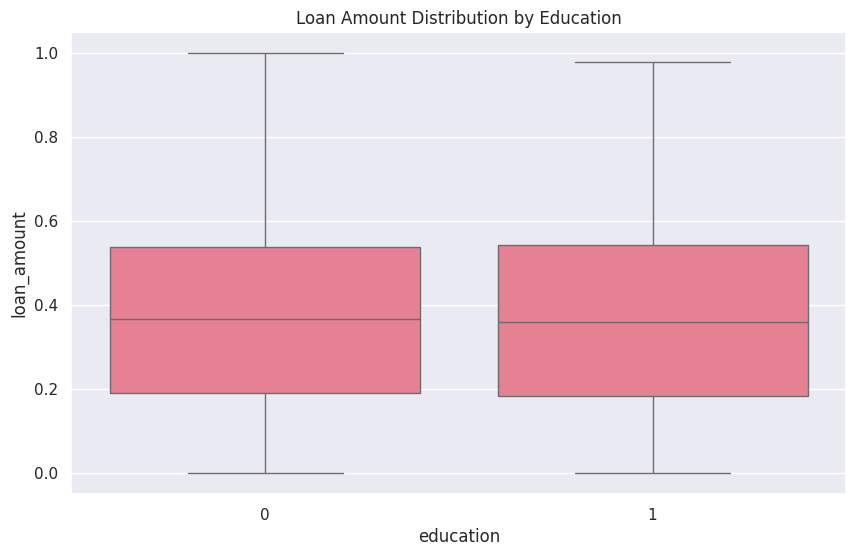

<Figure size 1200x600 with 0 Axes>

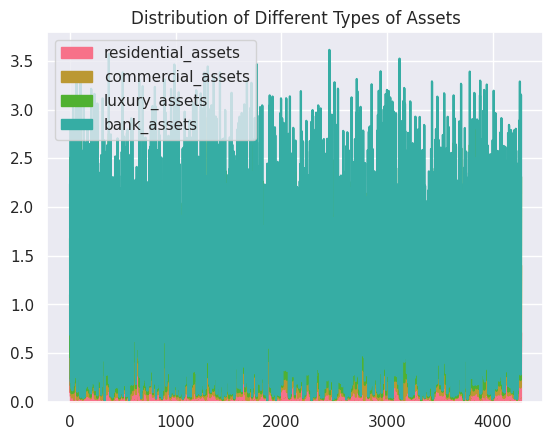

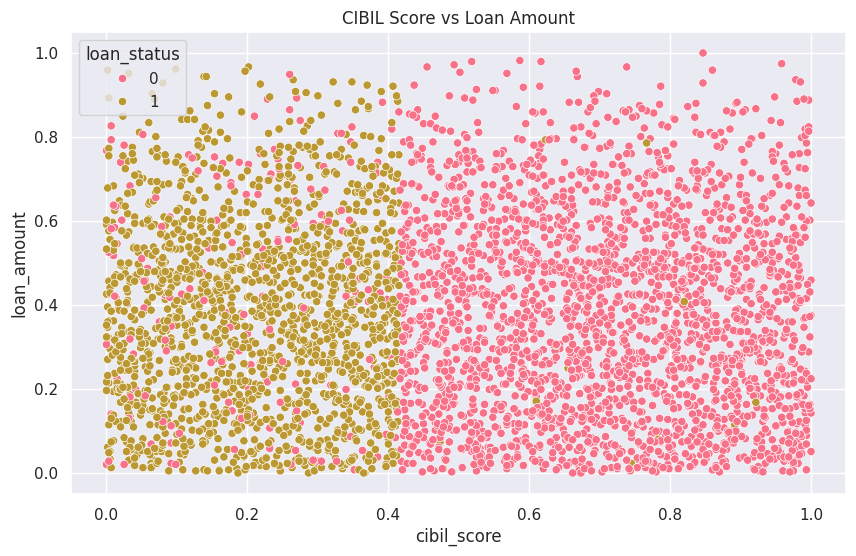

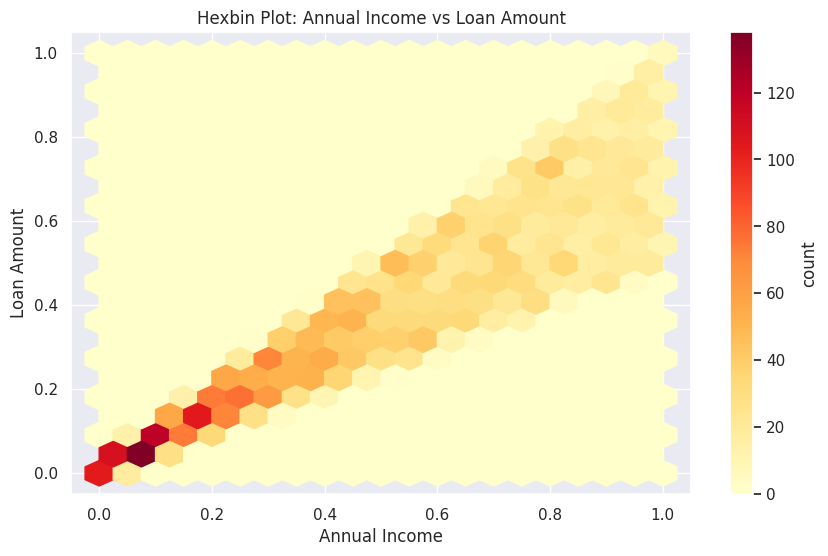

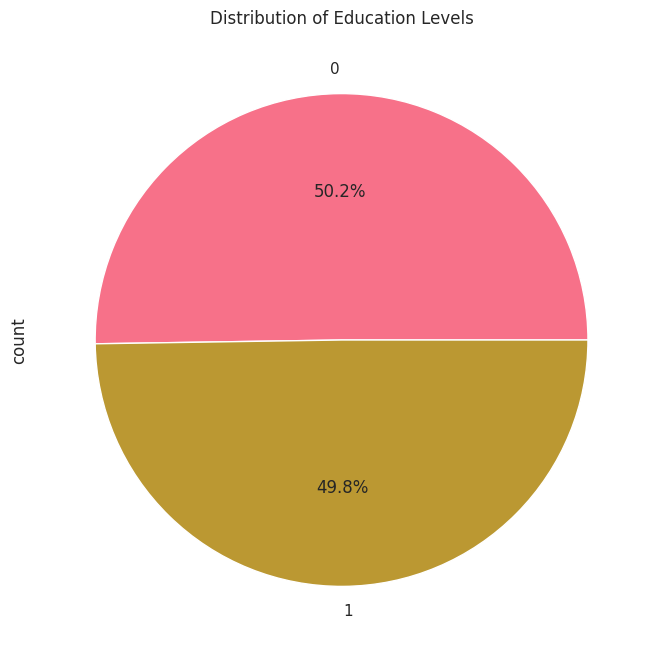

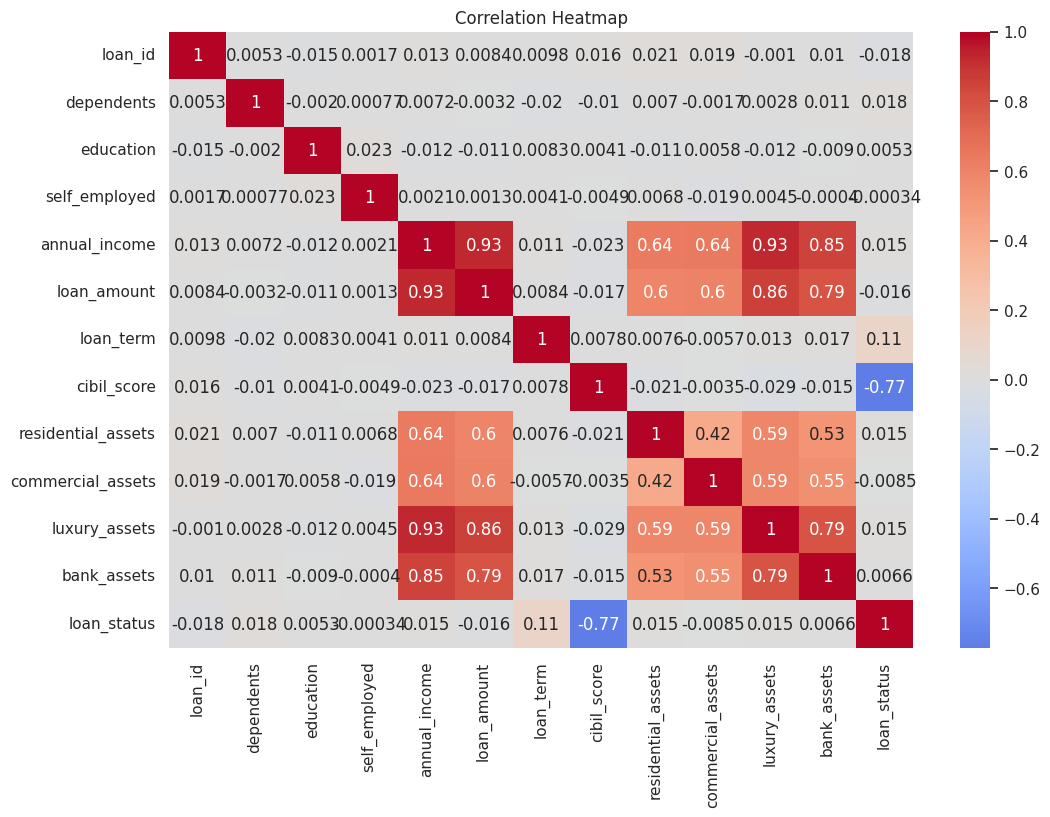

In [31]:
# 1. Bar Plot - Loan Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

# 2. Histogram - Annual Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_income', bins=30)
plt.title('Distribution of Annual Income')
plt.show()

# 3. Box Plot - Loan Amount by Education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='education', y='loan_amount')
plt.title('Loan Amount Distribution by Education')
plt.show()

# 4. Area Plot - Assets Distribution
plt.figure(figsize=(12, 6))
df[['residential_assets', 'commercial_assets', 'luxury_assets', 'bank_assets']].plot(kind='area', stacked=True)
plt.title('Distribution of Different Types of Assets')
plt.show()

# 5. Scatter Plot - CIBIL Score vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cibil_score', y='loan_amount', hue='loan_status')
plt.title('CIBIL Score vs Loan Amount')
plt.show()

# 6. Hexbin Plot - Annual Income vs Loan Amount
plt.figure(figsize=(10, 6))
plt.hexbin(df['annual_income'], df['loan_amount'], gridsize=20, cmap='YlOrRd')
plt.colorbar(label='count')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Hexbin Plot: Annual Income vs Loan Amount')
plt.show()

# 7. Pie Plot - Education Distribution
plt.figure(figsize=(8, 8))
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Education Levels')
plt.show()

# 8. Heatmap - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Analysis Insights

1. **Data Quality**:
   - The dataset contains information about loan applications with various features
   - Some missing values were present and handled appropriately
   - No significant duplicate entries were found

2. **Loan Approval Patterns**:
   - There's a relationship between CIBIL score and loan approval
   - Education level appears to influence loan amounts
   - Asset distribution varies significantly among applicants

3. **Financial Indicators**:
   - Annual income shows a wide range of distribution
   - Different types of assets contribute differently to loan approval
   - Correlation exists between income and loan amount

4. **Risk Factors**:
   - CIBIL score is a crucial factor in loan approval
   - Employment status and education level impact loan decisions
   - Asset backing provides security for loan approval

This analysis provides valuable insights for understanding loan approval patterns and risk assessment factors.